In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading and displaying information about dataset

In [2]:
df=pd.read_csv("laptop_data.csv")

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.shape

(1303, 12)

In [6]:
#drop index column
df=df.drop(df.columns[[0]], axis=1)

In [7]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.1200
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.9200


In [8]:
df.describe()

,Inches,Price
count,1303.000000,1303.000000
mean,15.017191,59870.042910
std,1.426304,37243.201786
min,10.100000,9270.720000
25%,14.000000,31914.720000
50%,15.600000,52054.560000
75%,15.600000,79274.246400
max,18.400000,324954.720000


#### Pre-processing requirements
1. Feature values such as Ram and Weight can be converted into numeric values by removing the strings "GB" and "KG".
Ram and Weight can thus be used for correlation analysis

2. Feature engineering required for columns: ScreenResolution, Cpu, Memory, Gpu
3. Handling categorical features before passing into model

#### Data Pre-Processing and EDA

In [9]:
#replacing str with null string
df['Ram']= df['Ram'].str.replace('GB', '')
df['Weight']= df['Weight'].str.replace('kg', '')

In [10]:
#converting column Ram and Weight to int and float respectively
df['Ram']= df['Ram'].astype('int')
df['Weight']=df['Weight'].astype('float')

In [11]:
#statistical summary of dataset
df.describe()

,Inches,Ram,Weight,Price
count,1303.000000,1303.000000,1303.000000,1303.000000
mean,15.017191,8.382195,2.038734,59870.042910
std,1.426304,5.084665,0.665475,37243.201786
min,10.100000,2.000000,0.690000,9270.720000
25%,14.000000,4.000000,1.500000,31914.720000
50%,15.600000,8.000000,2.040000,52054.560000
75%,15.600000,8.000000,2.300000,79274.246400
max,18.400000,64.000000,4.700000,324954.720000


In [12]:
df[df['Price']>80000]

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080
6,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04,114017.6016
12,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.8GHz,16,256GB SSD,AMD Radeon Pro 555,macOS,1.83,130001.6016
15,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,256GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,80908.3440
...,...,...,...,...,...,...,...,...,...,...,...
1243,Dell,2 in 1 Convertible,17.3,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Nvidia GeForce 940MX,Windows 10,2.77,95850.7200
1245,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,85248.0000
1247,Asus,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.34,123876.0000
1249,Dell,2 in 1 Convertible,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 7Y54 1.2GHz,8,256GB SSD,Intel HD Graphics 615,Windows 10,1.24,96596.6400


#### Visualization

**1. Density distribution of laptops based on Price of laptop**

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Price', ylabel='Density'>

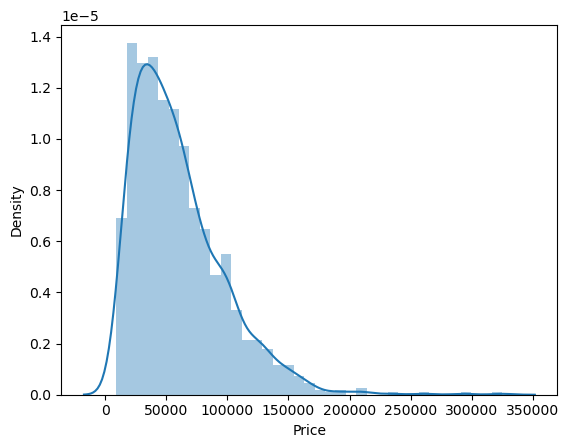

In [13]:
sns.distplot(df['Price'])

**1. Bar Plot shows the central tendency(mean in this case) of Price feature based on the all unique laptop companies present in dataset**

**2. The black bars on top of the main bars are called ERROR BARS and they indicate the estimated error to give a general sense of how precise the measurement is.**

<Axes: xlabel='Price', ylabel='Company'>

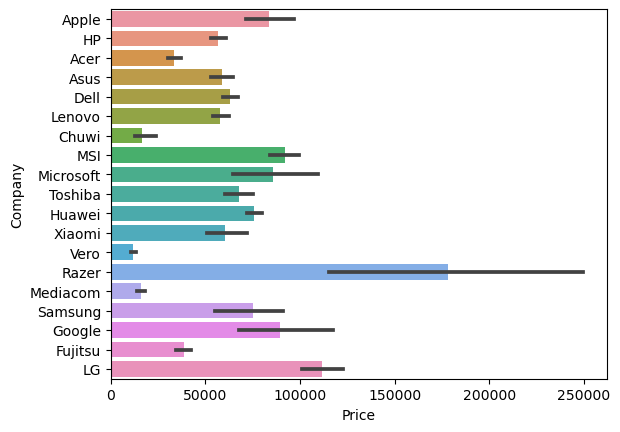

In [14]:
sns.barplot(y=df['Company'], x=df['Price'], orient='h')

**The length of the error bar helps indicate the uncertainty of the datapoint.**
1. SHORT ERROR BAR- Indicates that values are more concentrated and that the plotted average value is more accurate.
2. LONG ERROR BAR- Indicates that values are more spread out and thus the average becomes unreliable

**INFERENCE: Laptops made by RAZER have a long error bar meaning that the prices of RAZER laptops are very spread out thus indicating that the average datapoint plotted may not be reliable**

<Axes: title={'center': 'Price'}, xlabel='Company'>

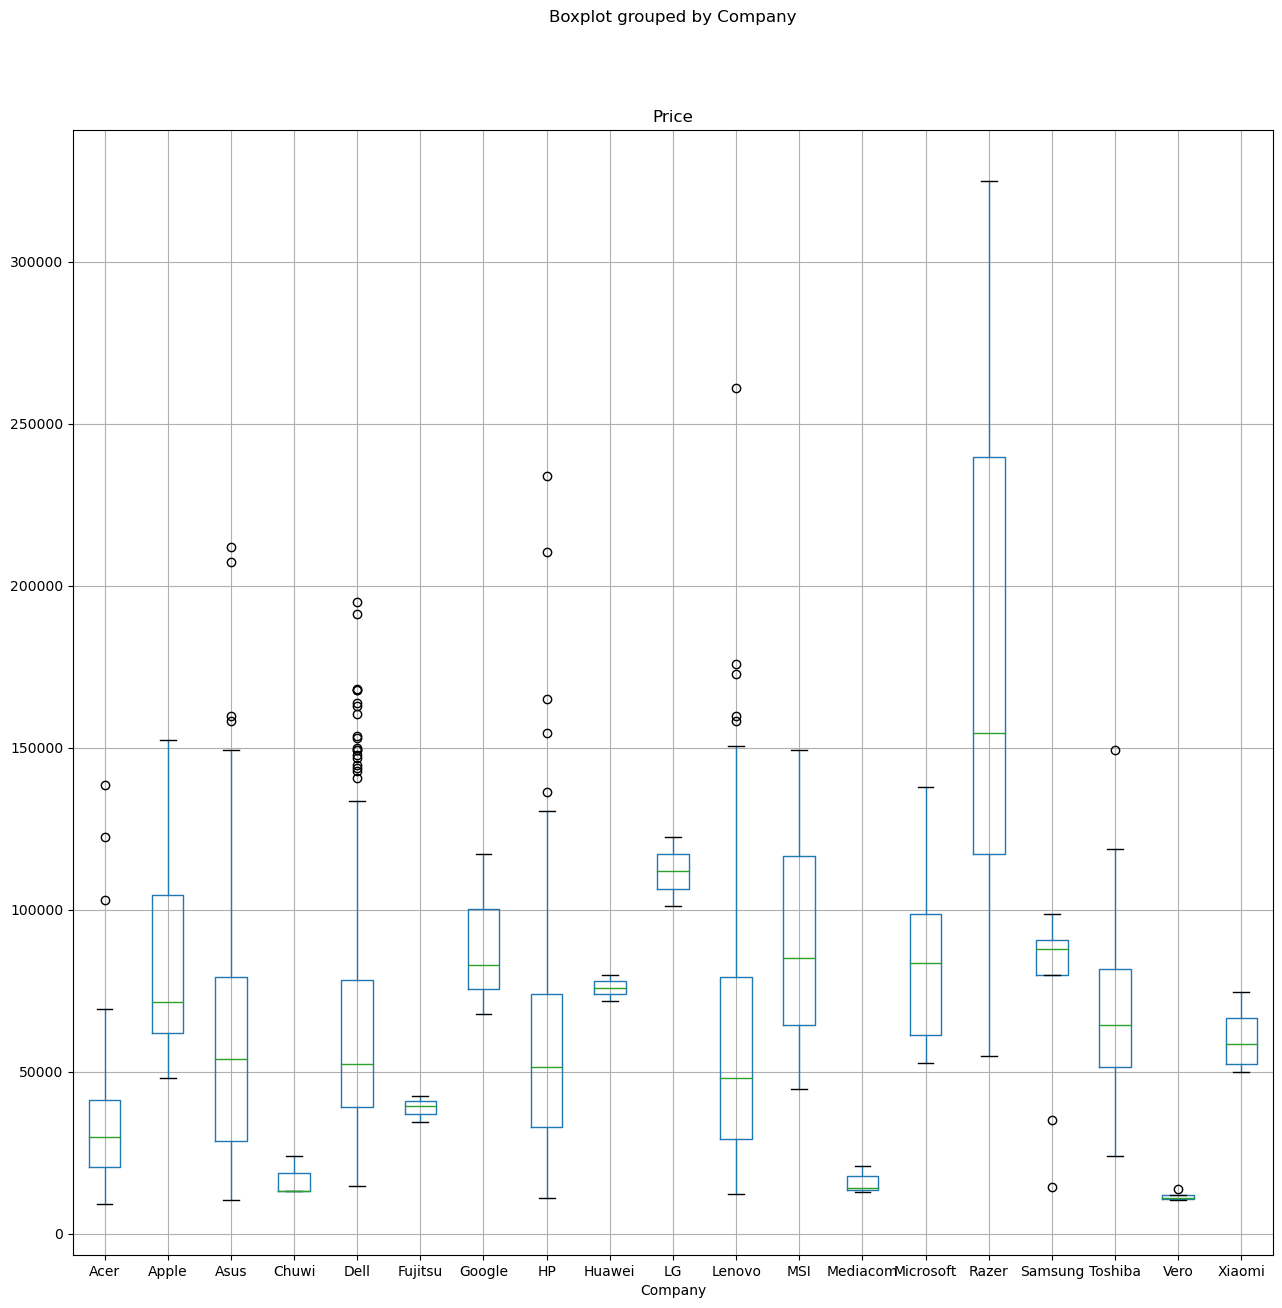

In [15]:
df.boxplot(by='Company', column=['Price'], figsize=(15,15))

In [16]:
df_razer=df[df['Company']=='Razer']
df_razer

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
196,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,324954.72
647,Razer,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,138474.72
778,Razer,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,154458.72
816,Razer,Ultrabook,12.5,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7500U 2.5GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.29,95850.72
830,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,292986.72
1117,Razer,Ultrabook,12.5,Touchscreen / 4K Ultra HD 3840x2160,Intel Core i7 6500U 2.5GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.25,54825.12
1231,Razer,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,1TB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,186426.72


**Outlier**

In [17]:
df[df.Price==df.Price.max()] 

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
196,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,324954.72


<Axes: xlabel='TypeName', ylabel='Price'>

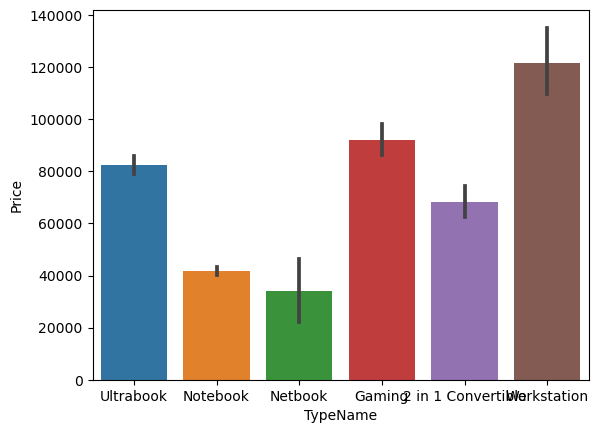

In [18]:
sns.barplot(x=df['TypeName'], y=df['Price'])

#### Feature Engineering

In [19]:
#view unique values before feature engineering
for str in df['ScreenResolution'].unique():
    print(str)

IPS Panel Retina Display 2560x1600
1440x900
Full HD 1920x1080
IPS Panel Retina Display 2880x1800
1366x768
IPS Panel Full HD 1920x1080
IPS Panel Retina Display 2304x1440
IPS Panel Full HD / Touchscreen 1920x1080
Full HD / Touchscreen 1920x1080
Touchscreen / Quad HD+ 3200x1800
IPS Panel Touchscreen 1920x1200
Touchscreen 2256x1504
Quad HD+ / Touchscreen 3200x1800
IPS Panel 1366x768
IPS Panel 4K Ultra HD / Touchscreen 3840x2160
IPS Panel Full HD 2160x1440
4K Ultra HD / Touchscreen 3840x2160
Touchscreen 2560x1440
1600x900
IPS Panel 4K Ultra HD 3840x2160
4K Ultra HD 3840x2160
Touchscreen 1366x768
IPS Panel Full HD 1366x768
IPS Panel 2560x1440
IPS Panel Full HD 2560x1440
IPS Panel Retina Display 2736x1824
Touchscreen 2400x1600
2560x1440
IPS Panel Quad HD+ 2560x1440
IPS Panel Quad HD+ 3200x1800
IPS Panel Quad HD+ / Touchscreen 3200x1800
IPS Panel Touchscreen 1366x768
1920x1080
IPS Panel Full HD 1920x1200
IPS Panel Touchscreen / 4K Ultra HD 3840x2160
IPS Panel Touchscreen 2560x1440
Touchscreen 

**In screen resolution information about:**
1. Whether IPS is present or not
2. Touch-Screen
3. X and Y axis screen res

**Split feature into above 3 features**

In [20]:
df['TouchScreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
def findXresolution(s):
    return s.split()[-1].split("x")[0]
def findYresolution(s):
    return s.split()[-1].split("x")[1]
#finding the x_res and y_res from screen resolution
df['X_res'] = df['ScreenResolution'].apply(lambda x: findXresolution(x))
df['Y_res'] = df['ScreenResolution'].apply(lambda y: findYresolution(y))
#convert to numeric
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')

In [21]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,1920,1080
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,3200,1800
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,1366,768
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,1366,768


In [22]:
df.corr()['Price'].sort_values(ascending=False)

C:\Users\Acer\AppData\Local\Temp\ipykernel_22924\2868777835.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price'].sort_values(ascending=False)


Price          1.000000
Ram            0.743007
X_res          0.556529
Y_res          0.552809
IPS            0.252208
Weight         0.210370
TouchScreen    0.191226
Inches         0.068197
Name: Price, dtype: float64

**Now, we can combine X_res, Y_res and Inches and create a new feature called Pixels per inch to reduce access features**

In [23]:
df['ppi'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.corr()['Price'].sort_values(ascending=False)

C:\Users\Acer\AppData\Local\Temp\ipykernel_22924\571222682.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Price'].sort_values(ascending=False)


Price          1.000000
Ram            0.743007
X_res          0.556529
Y_res          0.552809
ppi            0.473487
IPS            0.252208
Weight         0.210370
TouchScreen    0.191226
Inches         0.068197
Name: Price, dtype: float64

**Drop columns ScreenResolution, Inches, X_res and Y_res**

In [24]:
df=df.drop(columns=['ScreenResolution', 'Inches', 'X_res', 'Y_res'], axis=1)

In [25]:
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670


In [26]:
df.describe()

,Ram,Weight,Price,TouchScreen,IPS,ppi
count,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000,1303.000000
mean,8.382195,2.038734,59870.042910,0.147352,0.280123,146.635987
std,5.084665,0.665475,37243.201786,0.354593,0.449231,43.121345
min,2.000000,0.690000,9270.720000,0.000000,0.000000,90.583402
25%,4.000000,1.500000,31914.720000,0.000000,0.000000,127.335675
50%,8.000000,2.040000,52054.560000,0.000000,0.000000,141.211998
75%,8.000000,2.300000,79274.246400,0.000000,1.000000,157.350512
max,64.000000,4.700000,324954.720000,1.000000,1.000000,352.465147


In [27]:
for str in df['Cpu'].unique():
    print(str)

Intel Core i5 2.3GHz
Intel Core i5 1.8GHz
Intel Core i5 7200U 2.5GHz
Intel Core i7 2.7GHz
Intel Core i5 3.1GHz
AMD A9-Series 9420 3GHz
Intel Core i7 2.2GHz
Intel Core i7 8550U 1.8GHz
Intel Core i5 8250U 1.6GHz
Intel Core i3 6006U 2GHz
Intel Core i7 2.8GHz
Intel Core M m3 1.2GHz
Intel Core i7 7500U 2.7GHz
Intel Core i7 2.9GHz
Intel Core i3 7100U 2.4GHz
Intel Atom x5-Z8350 1.44GHz
Intel Core i5 7300HQ 2.5GHz
AMD E-Series E2-9000e 1.5GHz
Intel Core i5 1.6GHz
Intel Core i7 8650U 1.9GHz
Intel Atom x5-Z8300 1.44GHz
AMD E-Series E2-6110 1.5GHz
AMD A6-Series 9220 2.5GHz
Intel Celeron Dual Core N3350 1.1GHz
Intel Core i3 7130U 2.7GHz
Intel Core i7 7700HQ 2.8GHz
Intel Core i5 2.0GHz
AMD Ryzen 1700 3GHz
Intel Pentium Quad Core N4200 1.1GHz
Intel Atom x5-Z8550 1.44GHz
Intel Celeron Dual Core N3060 1.6GHz
Intel Core i5 1.3GHz
AMD FX 9830P 3GHz
Intel Core i7 7560U 2.4GHz
AMD E-Series 6110 1.5GHz
Intel Core i5 6200U 2.3GHz
Intel Core M 6Y75 1.2GHz
Intel Core i5 7500U 2.7GHz
Intel Core i3 6006U 2.2GHz

In [28]:
def fetch_processor(x):
    cpu_name = " ".join(x.split()[0:3])
    if cpu_name == 'Intel Core i7' or cpu_name == 'Intel Core i5' or cpu_name == 'Intel Core i3':
        return cpu_name
    elif cpu_name.split()[0] == 'Intel':
        return 'Other Intel Processor'
    else:
        return 'AMD Processor'
df['Cpu_brand'] = df['Cpu'].apply(lambda x: fetch_processor(x))

**UNSURE ABOUT OTHER INTEL PROCESSOR FEATURE**

**Price vs Processor**

<Axes: xlabel='Cpu_brand', ylabel='Price'>

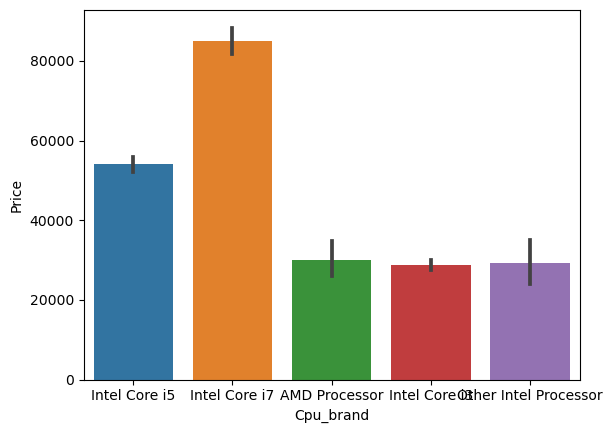

In [29]:
sns.barplot(y=df['Price'], x=df['Cpu_brand'], orient='v')

**Relation between Ram and Price**

In [30]:
df['Ram'].unique()

array([ 8, 16,  4,  2, 12,  6, 32, 24, 64])

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Ram', ylabel='Price'>

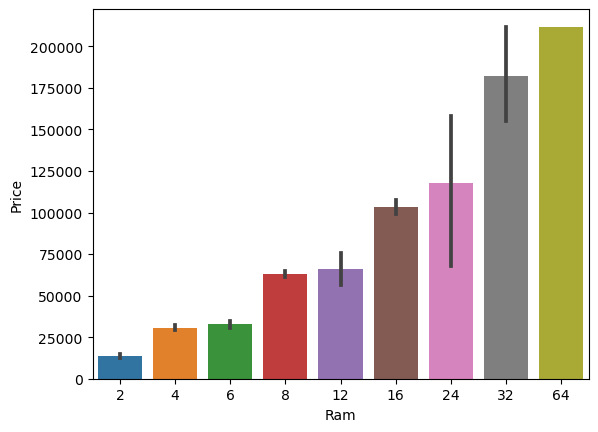

In [31]:
sns.barplot(df['Ram'], df['Price'])

**INFERENCE: More RAM, Higher price**

In [32]:
for str in df['Memory'].unique():
    print(str)

128GB SSD
128GB Flash Storage
256GB SSD
512GB SSD
500GB HDD
256GB Flash Storage
1TB HDD
32GB Flash Storage
128GB SSD +  1TB HDD
256GB SSD +  256GB SSD
64GB Flash Storage
256GB SSD +  1TB HDD
256GB SSD +  2TB HDD
32GB SSD
2TB HDD
64GB SSD
1.0TB Hybrid
512GB SSD +  1TB HDD
1TB SSD
256GB SSD +  500GB HDD
128GB SSD +  2TB HDD
512GB SSD +  512GB SSD
16GB SSD
16GB Flash Storage
512GB SSD +  256GB SSD
512GB SSD +  2TB HDD
64GB Flash Storage +  1TB HDD
180GB SSD
1TB HDD +  1TB HDD
32GB HDD
1TB SSD +  1TB HDD
512GB Flash Storage
128GB HDD
240GB SSD
8GB SSD
508GB Hybrid
1.0TB HDD
512GB SSD +  1.0TB Hybrid
256GB SSD +  1.0TB Hybrid


In [33]:
df['Memory']=df['Memory'].str.replace('.0','')
df['Memory']=df['Memory'].str.replace('GB', '')
df['Memory']=df['Memory'].str.replace('TB', '000')

C:\Users\Acer\AppData\Local\Temp\ipykernel_22924\636360035.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Memory']=df['Memory'].str.replace('.0','')


In [34]:
new=df['Memory'].str.split("+",1, expand=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_22924\2864593375.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  new=df['Memory'].str.split("+",1, expand=True)


In [35]:
new

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1298,128 SSD,None
1299,512 SSD,None
1300,64 Flash Storage,None
1301,1000 HDD,None


In [36]:
df['first']=new[0]
df['second']=new[1]

In [37]:
df['Layer1HDD']=df['first'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer1SSD']=df['first'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer1Hybrid']=df['first'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer1FlashStorage']=df['first'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

In [38]:
df['second'].fillna('0', inplace=True)
df['Layer2HDD']=df['second'].apply(lambda x: 1 if 'HDD' in x else 0)
df['Layer2SSD']=df['second'].apply(lambda x: 1 if 'SSD' in x else 0)
df['Layer2Hybrid']=df['second'].apply(lambda x: 1 if 'Hybrid' in x else 0)
df['Layer2FlashStorage']=df['second'].apply(lambda x: 1 if 'Flash Storage' in x else 0)

In [39]:
df['first'] = df['first'].str.replace(r'SSD', '')
df['first'] = df['first'].str.replace(r'HDD', '')
df['first'] = df['first'].str.replace(r'Hybrid', '')
df['first'] = df['first'].str.replace(r'Flash Storage', '')
df['first']=df['first'].astype(int)


In [40]:
df['second'] = df['second'].str.replace(r'SSD', '')
df['second'] = df['second'].str.replace(r'HDD', '')
df['second'] = df['second'].str.replace(r'Hybrid', '')
df['second'] = df['second'].str.replace(r'Flash Storage', '')
df['second']=df['second'].astype(int)

In [41]:
df['HDD']=(df['first']*df['Layer1HDD']+df['second']*df['Layer2HDD'])
df['SSD']=(df['first']*df['Layer1SSD']+df['second']*df['Layer2SSD'])
df['Hybrid']=(df['first']*df['Layer1Hybrid']+df['second']*df['Layer2Hybrid'])
df['Flash Storage']=(df['first']*df['Layer1FlashStorage']+df['second']*df['Layer2FlashStorage'])

In [42]:
df.drop(columns=['first', 'second', 'Layer1HDD','Layer2HDD', 'Layer1SSD', 'Layer2SSD', 'Layer1Hybrid', 'Layer2Hybrid', 'Layer1FlashStorage', 'Layer2FlashStorage'], inplace=True)

In [43]:
df

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,0,64
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,0,0


In [44]:
df.drop(columns=['Cpu', 'Memory'])

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,0,64
1301,HP,Notebook,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,0,0


In [45]:
df['Gpu_brand'] = df['Gpu'].apply(lambda x:x.split()[0])
#there is only 1 row of ARM GPU so remove it
df = df[df['Gpu_brand'] != 'ARM']
df.drop(columns=['Gpu'],inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_22924\3133666476.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'],inplace=True)


In [46]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

In [47]:
def category_os(os):
    if os=='Windows 10' or os== 'Windows 7' or os=='Windows 10 S':
        return 'Windows'
    elif os=='macOS' or os== 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
df['os']=df['OpSys'].apply(category_os)   

C:\Users\Acer\AppData\Local\Temp\ipykernel_22924\322279809.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os']=df['OpSys'].apply(category_os)


In [48]:
df.drop(columns=['OpSys'],inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_22924\3105339334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'],inplace=True)


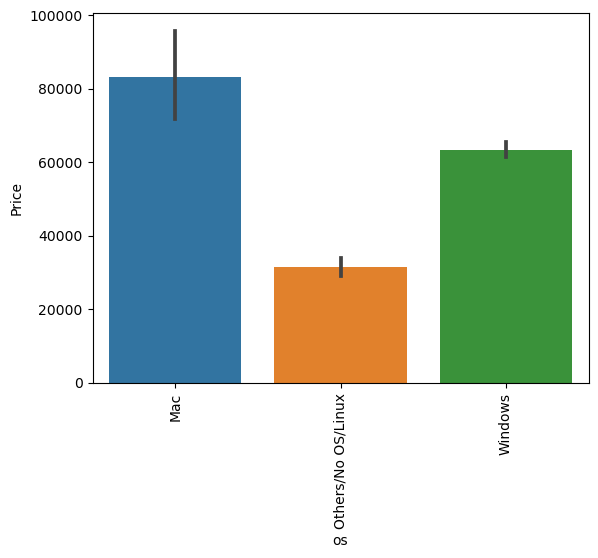

In [49]:
sns.barplot(x=df['os'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

### Model


In [50]:
df

,Company,TypeName,Cpu,Ram,Memory,Weight,Price,TouchScreen,IPS,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash Storage,Gpu_brand,os
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128 SSD,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128 Flash Storage,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256 SSD,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512 SSD,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256 SSD,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,4,128 SSD,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,0,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,Intel Core i7 6500U 2.5GHz,16,512 SSD,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,0,0,Intel,Windows
1300,Lenovo,Notebook,Intel Celeron Dual Core N3050 1.6GHz,2,64 Flash Storage,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,0,64,Intel,Windows
1301,HP,Notebook,Intel Core i7 6500U 2.5GHz,6,1000 HDD,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,0,0,AMD,Windows


In [51]:
df.to_csv('clean_laptop_data.csv')

**Handle Categorical values before applying model**

In [52]:
df= df.drop(columns=['Cpu', 'Memory'])

In [53]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,Cpu_brand,HDD,SSD,Hybrid,Flash Storage,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,0,0,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,0,0,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,0,64,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,0,0,AMD,Windows


In [54]:
df.corr()

C:\Users\Acer\AppData\Local\Temp\ipykernel_22924\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Ram,Weight,Price,TouchScreen,IPS,ppi,HDD,SSD,Hybrid,Flash Storage
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,0.170651,0.603590,0.042466,-0.059612
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.495839,-0.059686,0.098345,-0.179165
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.027189,0.666593,0.008765,-0.040067
TouchScreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.169234,0.256191,-0.038301,-0.020809
IPS,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.041934,0.224450,-0.020147,0.068616
ppi,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.212413,0.503160,-0.016948,0.076479
HDD,0.170651,0.495839,-0.027189,-0.169234,-0.041934,-0.212413,1.000000,-0.292954,-0.063287,-0.099582
SSD,0.603590,-0.059686,0.666593,0.256191,0.224450,0.503160,-0.292954,1.000000,-0.055847,-0.146394
Hybrid,0.042466,0.098345,0.008765,-0.038301,-0.020147,-0.016948,-0.063287,-0.055847,1.000000,-0.013841
Flash Storage,-0.059612,-0.179165,-0.040067,-0.020809,0.068616,0.076479,-0.099582,-0.146394,-0.013841,1.000000


In [55]:
 df1=df.drop(columns=['Hybrid', 'Flash Storage'])

In [56]:
df1.corr()

C:\Users\Acer\AppData\Local\Temp\ipykernel_22924\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Ram,Weight,Price,TouchScreen,IPS,ppi,HDD,SSD
Ram,1.000000,0.383362,0.742905,0.118875,0.207949,0.305688,0.170651,0.603590
Weight,0.383362,1.000000,0.209867,-0.293004,0.018643,-0.321883,0.495839,-0.059686
Price,0.742905,0.209867,1.000000,0.192917,0.253320,0.475368,-0.027189,0.666593
TouchScreen,0.118875,-0.293004,0.192917,1.000000,0.148026,0.458571,-0.169234,0.256191
IPS,0.207949,0.018643,0.253320,0.148026,1.000000,0.299142,-0.041934,0.224450
ppi,0.305688,-0.321883,0.475368,0.458571,0.299142,1.000000,-0.212413,0.503160
HDD,0.170651,0.495839,-0.027189,-0.169234,-0.041934,-0.212413,1.000000,-0.292954
SSD,0.603590,-0.059686,0.666593,0.256191,0.224450,0.503160,-0.292954,1.000000


In [57]:
# X1=df1.drop(columns=['Price'])
# Y1=df1['Price']

In [75]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.model_selection import train_test_split
# from sklearn.pipeline import make_pipeline
# from sklearn.compose import ColumnTransformer

In [76]:
# from sklearn.model_selection import train_test_split
# X1_train, X1_test, Y1_train, Y1_test=train_test_split(X1, Y1, test_size=0.2, random_state=1)

### Linear Reg

In [82]:
# lr=LinearRegression()

In [83]:
# pipe=make_pipeline(column_trans, lr)

NameError: name 'column_trans' is not defined

In [84]:
# pipe.fit(X1_train, Y1_train)

NameError: name 'pipe' is not defined

In [85]:
# y_pred=pipe.predict(X1_test)
# print('R2 score',r2_score(Y1_test,y_pred))

NameError: name 'pipe' is not defined

### Random Forest

In [ ]:
# step2= RandomForestRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75,
# max_depth=15)
# pipe = Pipeline([
# ('step1',column_trans),
# ('step2',step2)
# ])
# pipe.fit(X1_train,Y1_train)
# y_pred = pipe.predict(X1_test)
# print('R2 score',r2_score(Y1_test,y_pred))


### SVM

In [ ]:
# regressor = SVR(kernel = 'linear')
# pipe = Pipeline([
# ('step1',column_trans),
# ('step2',regressor)
# ])
# pipe.fit(X_train,Y_train)
# y_pred = pipe.predict(X_test)
# print('R2 score',r2_score(Y_test,y_pred))

**INFERENCE: Columns HDD, Hybrid and Flash Storage had no impact in the scores**

### Hyperparameter Tuning

### Random Forest

In [ ]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import GridSearchCV
# from pprint import pprint

In [ ]:
# rfc=RandomForestRegressor(random_state=42)

In [ ]:
# #parameters currently being used
# pprint(rfc.get_params())

**Parameters chosen to adjust:**
1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
5. min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement)

#### Randomized Search

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

In [ ]:
# max_features=['sqrt', 'log2']

In [ ]:
# max_depth=[int(x) for x in np.linspace(10, 100, num=11)]

In [ ]:
# min_samples_split=[2,4,10]

In [ ]:
# min_samples_leaf=[1,2,4]

In [ ]:
# bootstrap=[True, False]

In [ ]:
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

In [ ]:
# rf = RandomForestRegressor()

In [ ]:
# #3-cross_validation
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
# pipe=make_pipeline(column_trans, rf_random)

In [ ]:
# pipe.fit(X1_train, Y1_train)

In [ ]:
# #viewing the best parameters from fitting the random search
# rf_random.best_params_

**Evalutation of Random search model**

To determine if random search yielded a better model, we compare the base model with the best random search model.

**Base Model**

In [ ]:
# step2= RandomForestRegressor(n_estimators=100, random_state=42)
# pipe = Pipeline([
# ('step1',column_trans),
# ('step2',step2)
# ])
# pipe.fit(X1_train,Y1_train)
# y_pred = pipe.predict(X1_test)
# print('R2 score',r2_score(Y1_test,y_pred))


**Random Search model**

In [ ]:
# step2= RandomForestRegressor(n_estimators=1800, random_state=42, max_features='sqrt',
# max_depth=19, bootstrap=False, min_samples_split=4, min_samples_leaf=1)
# pipe = Pipeline([
# ('step1',column_trans),
# ('step2',step2)
# ])
# pipe.fit(X1_train,Y1_train)
# y_pred = pipe.predict(X1_test)
# print('R2 score',r2_score(Y1_test,y_pred))


#### Grid Search CV

In [ ]:
# from sklearn.model_selection import GridSearchCV

In [ ]:
# param_grid = {
#     'bootstrap': [False],
#     'max_depth': [20, 25, 30, 40],
#     'max_features': ['sqrt'],
#     'min_samples_leaf': [3, 4, 5],
#     'min_samples_split': [5, 7, 9],
#     'n_estimators': [1900, 1850, 1950]
# }

In [ ]:
# rf = RandomForestRegressor()

In [ ]:
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)

In [ ]:
# pipe=make_pipeline(column_trans, grid_search)

In [ ]:
# pipe.fit(X1_train, Y1_train)

In [ ]:
# #viewing the best parameters from fitting the random search
# rf_random.best_params_

In [ ]:
# step2= RandomForestRegressor(n_estimators=1400, random_state=42, max_features='sqrt',
# max_depth=19, bootstrap=False, min_samples_split=4, min_samples_leaf=1)
# pipe = Pipeline([
# ('step1',column_trans),
# ('step2',step2)
# ])
# pipe.fit(X1_train,Y1_train)
# y_pred = pipe.predict(X1_test)
# print('R2 score',r2_score(Y1_test,y_pred))


#### ROUGH

In [89]:
df1
df1.to_csv('clean_laptop_data1.csv')

In [90]:
X = df1.drop(columns=['Price'])
y = np.log(df1['Price'])

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [92]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [93]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

#### LR

In [94]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

In [95]:
df1.head(1)

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac


In [96]:
pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8010220318064502
MAE 0.21201335119225156


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### Lasso Regression

In [97]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.800780398628431
MAE 0.21283282196103567


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### KNN

In [98]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8065079492167575
MAE 0.1909320380874229


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### DT

In [99]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8309110199245187
MAE 0.18684628146582227


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### SVM

In [100]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8148307723245027
MAE 0.20503200003095295


#### Random Forest

In [101]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.8808941077301637
MAE 0.16095801452115857


#### Adaboost

In [102]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7882226806206558
MAE 0.23069282108077957


C:\Users\Acer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#### XgBoost

In [103]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

C:\Users\Acer\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2 score 0.881699977185086
MAE 0.16128569822229855


#### Export

In [104]:
import pickle

pickle.dump(df1,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [105]:
X_train

,Company,TypeName,Ram,Weight,TouchScreen,IPS,ppi,Cpu_brand,HDD,SSD,Gpu_brand,os
183,Toshiba,Notebook,8,2.00,0,0,100.454670,Intel Core i5,0,128,Intel,Windows
1141,MSI,Gaming,8,2.40,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows
1049,Asus,Netbook,4,1.20,0,0,135.094211,Other Intel Processor,0,0,Intel,Others/No OS/Linux
1020,Dell,2 in 1 Convertible,4,2.08,1,1,141.211998,Intel Core i3,1000,0,Intel,Windows
878,Dell,Notebook,4,2.18,0,0,141.211998,Intel Core i5,1000,128,Nvidia,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,0,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


In [106]:
import sklearn
print(sklearn.__version__)

1.2.2
